## Potential counterexamples to the Andrews-Curtis conjecture

In [1]:
# load package from Finite_Spaces
!sage --preparse Finite_Spaces/Homotopy.sage
!mv Finite_Spaces/Homotopy.sage.py Finite_Spaces/Homotopy.py
!sage --preparse Finite_Spaces/Deformations.sage
!mv Finite_Spaces/Deformations.sage.py Finite_Spaces/Deformations.py
!sage --preparse Finite_Spaces/Presentations.sage
!mv Finite_Spaces/Presentations.sage.py Finite_Spaces/Presentations.py
!sage --preparse Finite_Spaces/Morse.sage
!mv Finite_Spaces/Morse.sage.py Finite_Spaces/Morse.py
!sage --preparse Finite_Spaces/Colorings.sage
!mv Finite_Spaces/Colorings.sage.py Finite_Spaces/Colorings.py

from Finite_Spaces.Presentations import *
from Finite_Spaces.Morse         import *

We next prove that the following potential counterexamples of the Andrews-Curtis conjecture do satisfy the conjecture.

### 1. Akbulut & Kirby

$
\mathcal{A K}_2=\langle x, y~|~ xyx = yxy, ~x^2 = y^{3}\rangle
$ 

In [22]:
# list of generators
gens = ['x', 'y']

# list of relators: each relator is a list of tuples of (generator, exponent)
rels = [[('x',2), ('y',-3)], [('x',1), ('y',1), ('x',1), ('y',-1), ('x', -1), ('y', -1)]]

# group presentation
G = group_presentation(gens, rels)
print(G)

Finitely presented group < x, y | x^2*y^-3, x*y*x*y^-1*x^-1*y^-1 >


In [23]:
# greedy simplification of AK2
G.simplified()

Finitely presented group < x, y | x^2*y^-3, x*y*x*y^-1*x^-1*y^-1 >

In [24]:
# compute the poset associated to the presentation, that is, the face poset of the barycentric subdivision of the 
# standard complex associated to the original presentation
X = presentation_poset(gens, rels)

In [25]:
len(X)

53

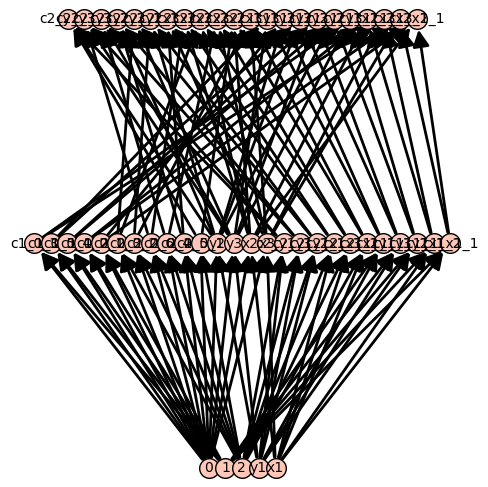

In [28]:
X.show(figsize = (10,5))

In [15]:
%%time

l = len(G.simplified().generators())

while l>1:
    M  = spanning_matching(X) #generate a random acyclic matching with a single critical 0-cell
    Q  = Morse_presentation(gens, rels, M)
    PP = Q.simplified()
    l = len(PP.generators())
print('Original Presentation:\n', G)
print('Reduction of Original presentation:\n', G.simplified())
print('Morse Presentation:\n', Q)
print('Reduction of the Morse presentation:\n', PP)

Original Presentation:
 Finitely presented group < x, y | x^2*y^-3, x*y*x*y^-1*x^-1*y^-1 >
Reduction of Original presentation:
 Finitely presented group < x, y | x^2*y^-3, x*y*x*y^-1*x^-1*y^-1 >
Morse Presentation:
 Finitely presented group < a0, a1, a2 | a1*a2^-1*a0*a1*a0^-1*a2*a1^-2*a0^-1*a2, a1*a2*a1^-1*a0^-1*a2*a1, a1^-1*a0^-1*a1 >
Reduction of the Morse presentation:
 Finitely presented group <  |  >
CPU times: user 63 ms, sys: 0 ns, total: 63 ms
Wall time: 63.2 ms


### 2. Miller III & Schupp

$
\mathcal{M S}_3 = \langle x,y~|~x^{-1}y^3 x = y^4, x = y^{-1}xyx^{-1}\rangle
$

In [16]:
gens = ['x', 'y']

n=3
rels = [[('x',-1), ('y',n), ('x',1), ('y', -(n+1))], [('y',-1), ('x',1), ('y',1), ('x', -2)]]

# group presentation
G = group_presentation(gens, rels)
print(G)
print(G.simplified())

Finitely presented group < x, y | x^-1*y^3*x*y^-4, y^-1*x*y*x^-2 >
Finitely presented group < x, y | y^-1*x*y*x^-2, y^2*x*y^-3*x^-2 >


In [17]:
X = presentation_poset(gens, rels)
len(X)

65

In [18]:
%%time

l = len(G.simplified().generators())

while l>1:
    M  = spanning_matching(X) #generate a random acyclic matching with a single critical 0-cell
    Q  = Morse_presentation(gens, rels, M)
    PP = Q.simplified()
    l = len(PP.generators())
print('Original Presentation:\n', G)
print('Reduction of Original presentation:\n', G.simplified())
print('Morse Presentation:\n', Q)
print('Reduction of the Morse presentation:\n', PP)

Original Presentation:
 Finitely presented group < x, y | x^-1*y^3*x*y^-4, y^-1*x*y*x^-2 >
Reduction of Original presentation:
 Finitely presented group < x, y | y^-1*x*y*x^-2, y^2*x*y^-3*x^-2 >
Morse Presentation:
 Finitely presented group < a0, a1, a2, a3, a4 | a4^-1*a0^-1*a4*a3*a1*a3^-1*a4^-1*a0*a4*a3, a4^-1*a0*a4*a3^-1*a2*a4^-1*a0^-1*a4*a3, (a4^-1*a0^-1*a4*a3)^2*a4^-1, a3^-1*a4^-1*a0*a4*a1^-1*a0^-1*a4*a3^-1*a4^-1*a0*a4, a3^-1*a2^-1 >
Reduction of the Morse presentation:
 Finitely presented group <  |  >
CPU times: user 3.73 s, sys: 0 ns, total: 3.73 s
Wall time: 3.72 s


### 3. Gordon

$\mathcal{G}_q =\langle x,y~|~x=x^{-1}y^{-1}x y, y = y^{-1}x^q y x^{-q}\rangle$

In [2]:
gens = ['x', 'y']
def rels_Gordon(q):
    rels = [[('x', -1)] + commutator([('x', -1)], [('y', -1)]), [('y', -1)] + commutator([('x', -q)], [('y', 1)])]
    return rels

In [21]:
q=5
rels = rels_Gordon(q)
G = group_presentation(gens, rels)
print(G)
print(G.simplified())

Finitely presented group < x, y | x^-2*y^-1*x*y, y^-1*x^-5*y*x^5*y^-1 >
Finitely presented group < x, y | x^-2*y^-1*x*y, y^-1*x^-2*y*x^-1*y^-1 >


In [22]:
X = presentation_poset(gens, rels)
len(X)

81

In [23]:
%%time

l = len(G.simplified().generators())

while l>1:
    M  = spanning_matching(X) #generate a random acyclic matching with a single critical 0-cell
    Q  = Morse_presentation(gens, rels, M)
    PP = Q.simplified()
    l = len(PP.generators())
print('Original Presentation:\n', G)
print('Reduction of Original presentation:\n', G.simplified())
print('Morse Presentation:\n', Q)
print('Reduction of the Morse presentation:\n', PP)

Original Presentation:
 Finitely presented group < x, y | x^-2*y^-1*x*y, y^-1*x^-5*y*x^5*y^-1 >
Reduction of Original presentation:
 Finitely presented group < x, y | x^-2*y^-1*x*y, y^-1*x^-2*y*x^-1*y^-1 >
Morse Presentation:
 Finitely presented group < a0, a1, a2, a3, a4, a5, a6, a7, a8 | a8^-1*a3*a1^-1*a5*a4^-1, a8^-1*a3*(a5^-1*a1)^2*a5^-1*a0*a3*a1^-1*a5*a3^-1*a8, a1^-1*a5*a3^-1*a8*a2*(a1^-1*a5)^2, a0^-1*a4*a1^-1*a5*a2^-1*a6*a8^-1*a3*a5^-1*a1*a3^-1, a8^-1*a3*(a5^-1*a1)^2*a3^-1*a0^-1*a4*a1^-1*a5*a3^-1*a8*a6^-1*a7, a3^-1*a8*a7^-1, a5^-1*a1^2, a1^-1*a5*a3^-1, a3*a1^-1*a5*a0^-1*a4*a5^-1*a1*a4^-1*a0 >
Reduction of the Morse presentation:
 Finitely presented group <  |  >
CPU times: user 296 ms, sys: 0 ns, total: 296 ms
Wall time: 307 ms


In [18]:
q=99
rels = rels_Gordon(q)
G = group_presentation(gens, rels)
print(G)
print(G.simplified())

Finitely presented group < x, y | x^-2*y^-1*x*y, y^-1*x^-99*y*x^99*y^-1 >
Finitely presented group < x, y | x^-2*y^-1*x*y, y^-1*x^-49*y*x^-1*y^-1 >


In [19]:
# Associated poset
X = presentation_poset(gens, rels)
len(X)

833

In [20]:
# Total relator length
total_length_relator = 5 + 3 + 2*q
print(total_length_relator)

206


In [21]:
%%time

l = len(G.simplified().generators())

while l>1:
    M  = spanning_matching(X) #generate a random acyclic matching with a single critical 0-cell
    Q  = Morse_presentation(gens, rels, M)
    PP = Q.simplified()
    l = len(PP.generators())
print('Original Presentation:\n', G)
print('Reduction of Original presentation:\n', G.simplified())
print('Morse Presentation:\n', Q)
print('Reduction of the Morse presentation:\n', PP)

Original Presentation:
 Finitely presented group < x, y | x^-2*y^-1*x*y, y^-1*x^-99*y*x^99*y^-1 >
Reduction of Original presentation:
 Finitely presented group < x, y | x^-2*y^-1*x*y, y^-1*x^-49*y*x^-1*y^-1 >
Morse Presentation:
 Finitely presented group < a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22, a23, a24, a25, a26, a27, a28, a29, a30, a31, a32, a33, a34, a35, a36, a37, a38, a39, a40, a41, a42, a43, a44, a45, a46, a47, a48, a49, a50, a51, a52, a53, a54, a55, a56, a57, a58, a59, a60, a61, a62, a63, a64, a65, a66, a67, a68, a69, a70, a71, a72, a73, a74, a75 | (a48^-1*a15*a1^-1*a51)^2*a72^-1*a10*a15^-1*a48, a48^-1*a15*a1^-1*a51*a71^-1*a30*a48^-1*a15*a1^-1*a51, (a48^-1*a15*a1^-1*a51)^4*a48^-1*a15*a21^-1*a14*a1^-1*a51, (a15^-1*a48*a51^-1*a1)^2*a15^-1*a48*a46^-1*a57*a51^-1*a1, a48^-1*a15*a1^-1*a51*a70^-1*a9*a15^-1*a48, a15^-1*a48*a51^-1*a1*a15^-1*a48*a34^-1*a46*a51^-1*a1, (a15^-1*a48*a51^-1*a1)^2*a15^-1*a48*a44^-1*a50*a48^-1*a15

### 4. Barmak

$\mathcal{B}=\langle x,y~|~[x,y],1\rangle$

$\mathcal{B'}=\langle x,y~|~[x,[x,y^{-1}]]^2y[y^{-1},x]y^{-1},[x,[[y^{-1},x],x]]\rangle$

In [14]:
gens = ['x', 'y']

r1 = commutator([('x',1)], commutator([('x',1)],[('y',-1)])) + commutator([('x',1)], commutator([('x',1)],[('y',-1)])) + conj(commutator([('y',-1)],[('x',1)]), [('y',1)])
r2 = commutator([('x',1)],commutator(commutator([('y',-1)],[('x',1)]), [('x',1)]))

rels = [r1,r2]

In [15]:
G = group_presentation(gens, rels)
print(G)
print(G.simplified())

Finitely presented group < x, y | x*(x*y^-1*x^-1*y*x^-1*y^-1*x*y)^2*y*x^-1*y^-1, x*y^-1*x*y*x*y^-1*x^-1*y*x^-1*y^-1*x*y*x^-1*y^-1*x^-1*y >
Finitely presented group < x, y | x^3*y^-1*x^-1*y*x^-2*y^-1*x*y^2*x^-1*y^-1, x*y^-1*x*y*x*y^-1*x^-1*y*x^-1*y^-1*x*y*x^-1*y^-1*x^-1*y >


In [16]:
X = presentation_poset(gens, rels)
len(X)

201

In [10]:
%%time

l = len(G.simplified().relations())

while l>1:
    M  = spanning_matching(X) #generate a random acyclic matching with a single critical 0-cell
    Q  = Morse_presentation(gens, rels, M)
    PP = Q.simplified()
    l = len(PP.relations())
    
print('Original Presentation:\n', G)
print('Reduction of Original presentation:\n', G.simplified())
print('Morse Presentation:\n', Q)
print('Reduction of the Morse presentation:\n', PP)

Original Presentation:
 Finitely presented group < x, y | x*(x*y^-1*x^-1*y*x^-1*y^-1*x*y)^2*y*x^-1*y^-1, x*y^-1*x*y*x*y^-1*x^-1*y*x^-1*y^-1*x*y*x^-1*y^-1*x^-1*y >
Reduction of Original presentation:
 Finitely presented group < x, y | x^3*y^-1*x^-1*y*x^-2*y^-1*x*y^2*x^-1*y^-1, x*y^-1*x*y*x*y^-1*x^-1*y*x^-1*y^-1*x*y*x^-1*y^-1*x^-1*y >
Morse Presentation:
 Finitely presented group < a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22 | a11^-1*a18*a19^-1*a8, a3^-1*a9*a6^-1*a22*a17^-1*a5*a9^-1*a3, a18^-1*a11*a5^-1*a17*a14^-1*a18, a18^-1*a11*a5^-1*a17*a15^-1*a21*a17^-1*a5*a15, a1^-1*a0, a11^-1*a18*a17^-1*a5*a15*a18^-1*a11*a8^-1*a20*a17^-1*a5, a15^-1*a5^-1*a17*a18^-1*a11*a15*a13^-1*a6*a11^-1*a18, a11^-1*a18*a17^-1*a5*a15*a18^-1*a11*a9^-1*a3*a2^-1*a10, a11^-1*a18*a16^-1, a15^-1*a5^-1*a17*a18^-1*a11*a9^-1*a3*a16, a11^-1*a18*a17^-1*a5*a15*a17^-1*a5*a9^-1*a3*a0^-1*a18^-1*a11, a11^-1*a18*a17^-1*a5*a15*a18^-1*a11*a7^-1*a13*a17^-1*a5, a11^-1*a18*a1